### Full stack, 6-7mm gap. Now with 3 mm aperture on PFS

**Notes:**

Base pressure is 4.0e-6 mBar.

**Conclusion:**

TBD.



### Communicate with the Keithley DMM Array Plate Monitor and Take Data

1. Connect to the Keithley over local area network ethernet
2. Take current reading (voltage across 100 Ohm resistor)
    * Flick switch to current on array plate interface box
3. Take voltage reading (charge accumulated on floating pin of array plate)
    * Flick switch to voltage on array plate interface box
4. Append readings in the form of a dictionary to a list
5. Repeat until all data is taken
6. Save data to json file
7. Disconnect Keithley to release the socket so other programs can use it


### Use the following cells to take data

In [2]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)

<module 'ArrayPlateLogger' from 'C:\\Users\\matt_\\Documents\\GitHub\\ArrayPlateKeithleyLogger\\ArrayPlateLogger.py'>

In [3]:
apl.disconnectVisa() # If you lose communications with the Keithley, run this.

In [4]:
data = apl.arrayPlateMeasurement()

In [5]:
data.connect()

KEITHLEY INSTRUMENTS INC.,MODEL 2701,4368285,D05  /A02  


### Run the following cell just to get a quick reading

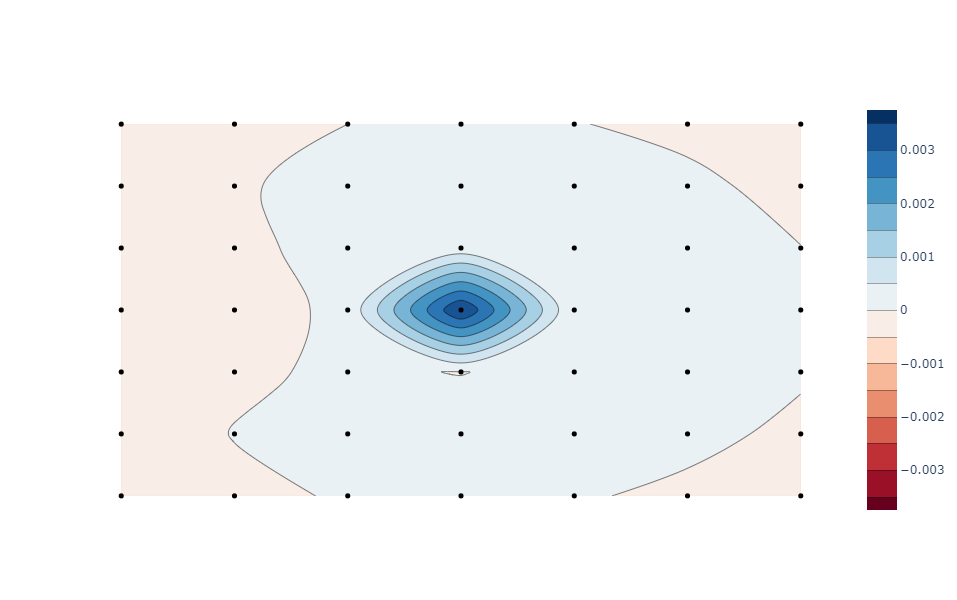

In [11]:
currents = data.readCurrents(centre5x5 = False)
apl.plotI(currents)

### Run following cell to add data to list of dictionaries

In [17]:
# data.data[-1]['pressure'] = 8e-5 # correct pressure reading
data.deleteLast()

Number of entries: 1


Number of entries: 5


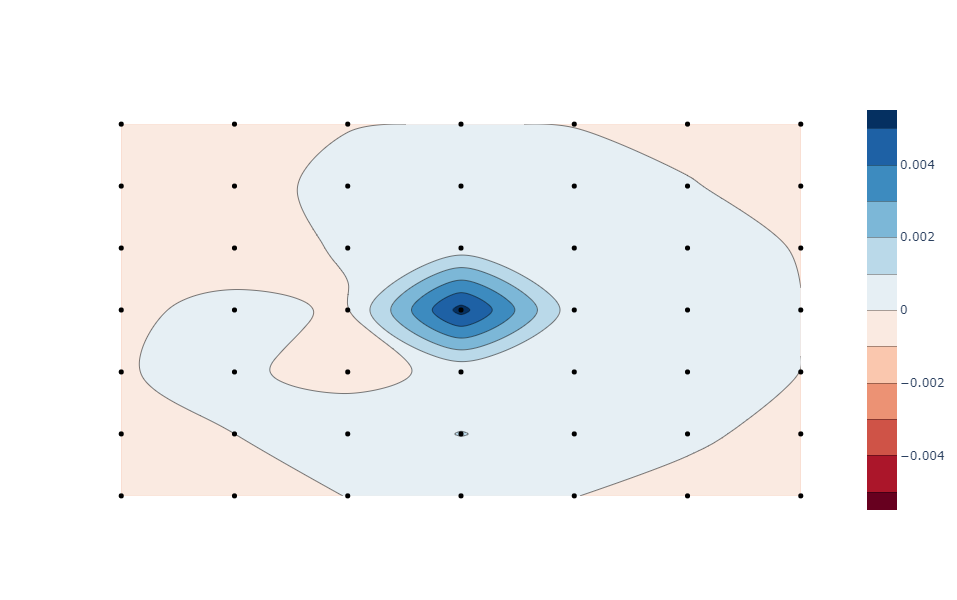

In [13]:
currents = data.readCurrents(centre5x5=False)
# apl.plotI(currents)
data.append(
    pressure = 0.29e-4,
    Vbias = 120,
    Ibias = 1.7,
    Varc = 65.5,
    Iarc = 1.29,
    Ibase = 0.105,
    Vext = 6000,
    Iext = 0.1,
    Ve1 = -2777,
    Ie1 = -1.65,
    Ve23 = 0,
    Ie23 = 0,
    currents = currents,
    note = ''
)
data.plotI()

In [14]:
data.save('data')

data_201215_155555.json


In [15]:
data.disconnect()

### Use the following cells to look at the data

* I didn't get much data because the filament was failing and gave up during the penultimate run.
* The current hitting the baseplate and the fluorescence visible in the chamber was highly dependent on the gas pressure.
* I am not convinced that the bias current is representative of typical running conditions because the filament was failing and will have had a hot spot.
* I varied the bias voltage and extraction voltage but because the extraction voltage was actually set positive, the bias voltage was highly coupled to it and floated up to always be 5 to 10 V more positive than the voltage on the extractor.
* Need at least + 100 V bias/extraction V or ion current is not centralised on the array plate.

In [16]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)
savedData = apl.arrayPlateMeasurement()
savedData.load("data_201215_155555.json")
# savedData = data

5 entries loaded.


In [17]:
savedData.exportCSV('data_201215_155555')

,time,pressure,Vbias,Ibias,Varc,Iarc,Ibase,IpinMax,Vext,Iext,Ve1,Ie1
0,201215_152941,0.00005,120,1.0,65.0,0.41,0.044,0.002738,-3980.0,0.1,-2.321,-0.95


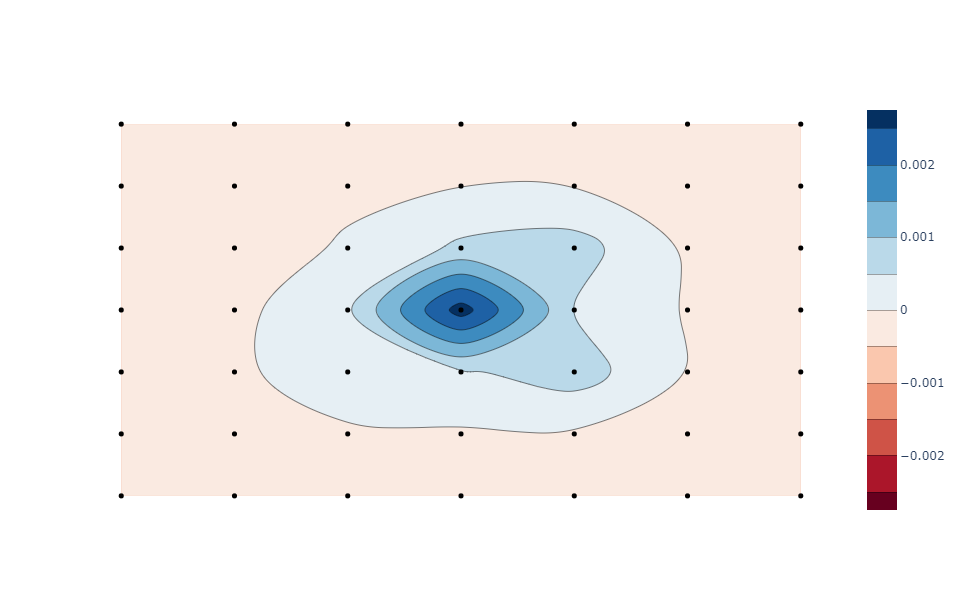

,time,pressure,Vbias,Ibias,Varc,Iarc,Ibase,IpinMax,Vext,Iext,Ve1,Ie1
1,201215_153210,0.00005,120,1.0,65.5,0.39,0.116,0.001767,5.15,0.3,0.0,-0.19


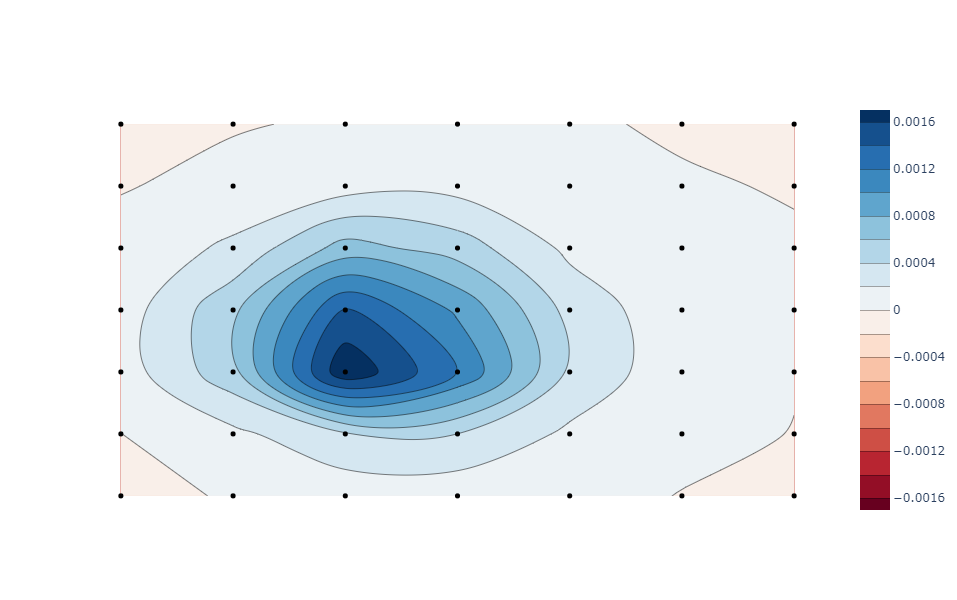

,time,pressure,Vbias,Ibias,Varc,Iarc,Ibase,IpinMax,Vext,Iext,Ve1,Ie1
2,201215_153222,0.00005,120,1.0,65.5,0.39,0.116,0.001713,5.15,0.3,0.0,-0.19


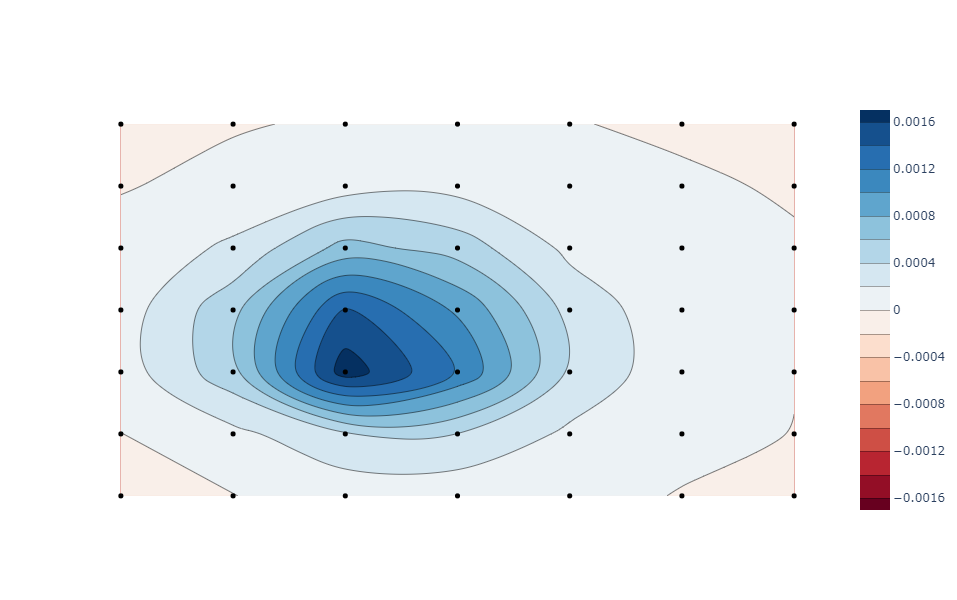

,time,pressure,Vbias,Ibias,Varc,Iarc,Ibase,IpinMax,Vext,Iext,Ve1,Ie1
3,201215_154401,0.000027,120,5.1,65.5,3.95,0.099,0.00424,6000.0,3.8,-2318.0,-1.27


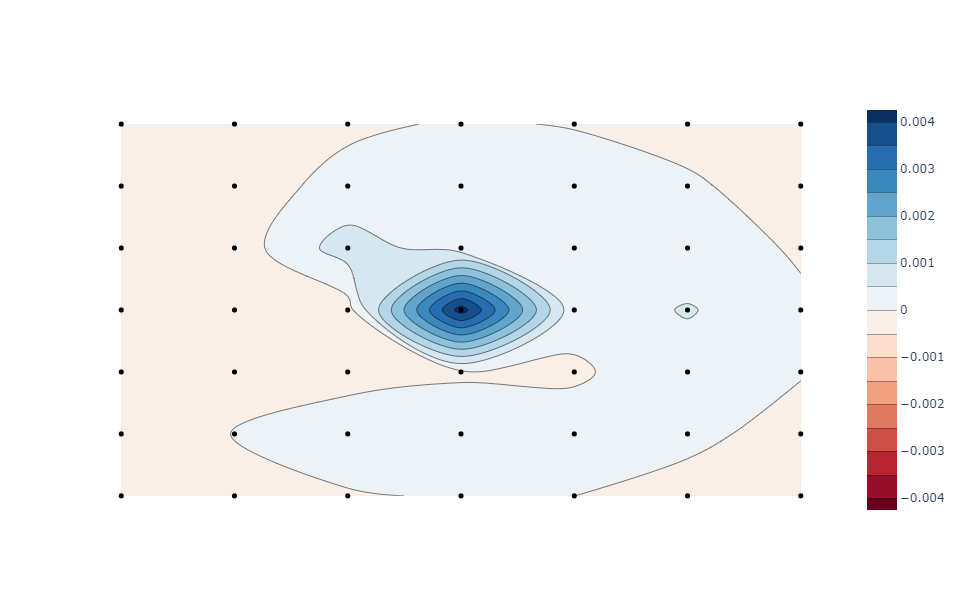

,time,pressure,Vbias,Ibias,Varc,Iarc,Ibase,IpinMax,Vext,Iext,Ve1,Ie1
4,201215_154829,0.000029,120,1.7,65.5,1.29,0.105,0.005383,6000.0,0.1,-2777.0,-1.65


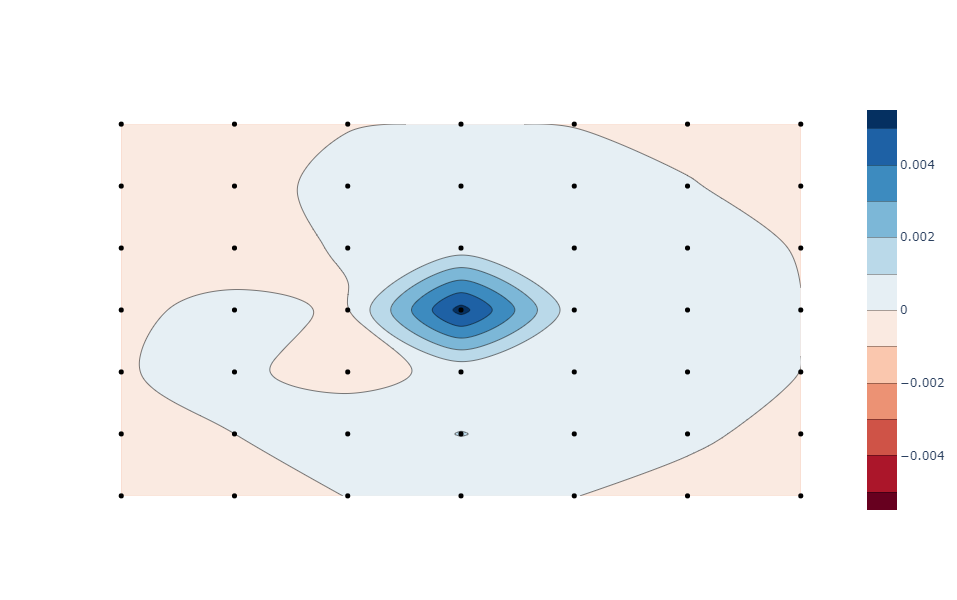

In [20]:
# conda install -c plotly plotly-orca
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
from IPython.display import Image
df = pd.DataFrame(savedData.data)
# df = df[['time', 'Vbias', 'Ibias', 'Vext', 'Iext', 'Ve1', 'Ie1', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]

IpinMax = []
for currentArray in df.currents:
    IpinMax.append(np.max(currentArray))
    
df = df[['time', 'pressure', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Ibase', 'Vext', 'Iext', 'Ve1', 'Ie1']]
df.insert(7, "IpinMax", IpinMax, True)

for i in range(savedData.len()):
    display(df[i:i+1])
    fig = savedData.plotI(i)
    fig = apl.plotI(data.data[i]['currents'])
#     display(Image(pio.to_image(fig, scale = 1.35, format='png'))) # use this to have static graphs render on github.
    fig.show()

#### Export .csv file where we only need a slice of current through the middle.

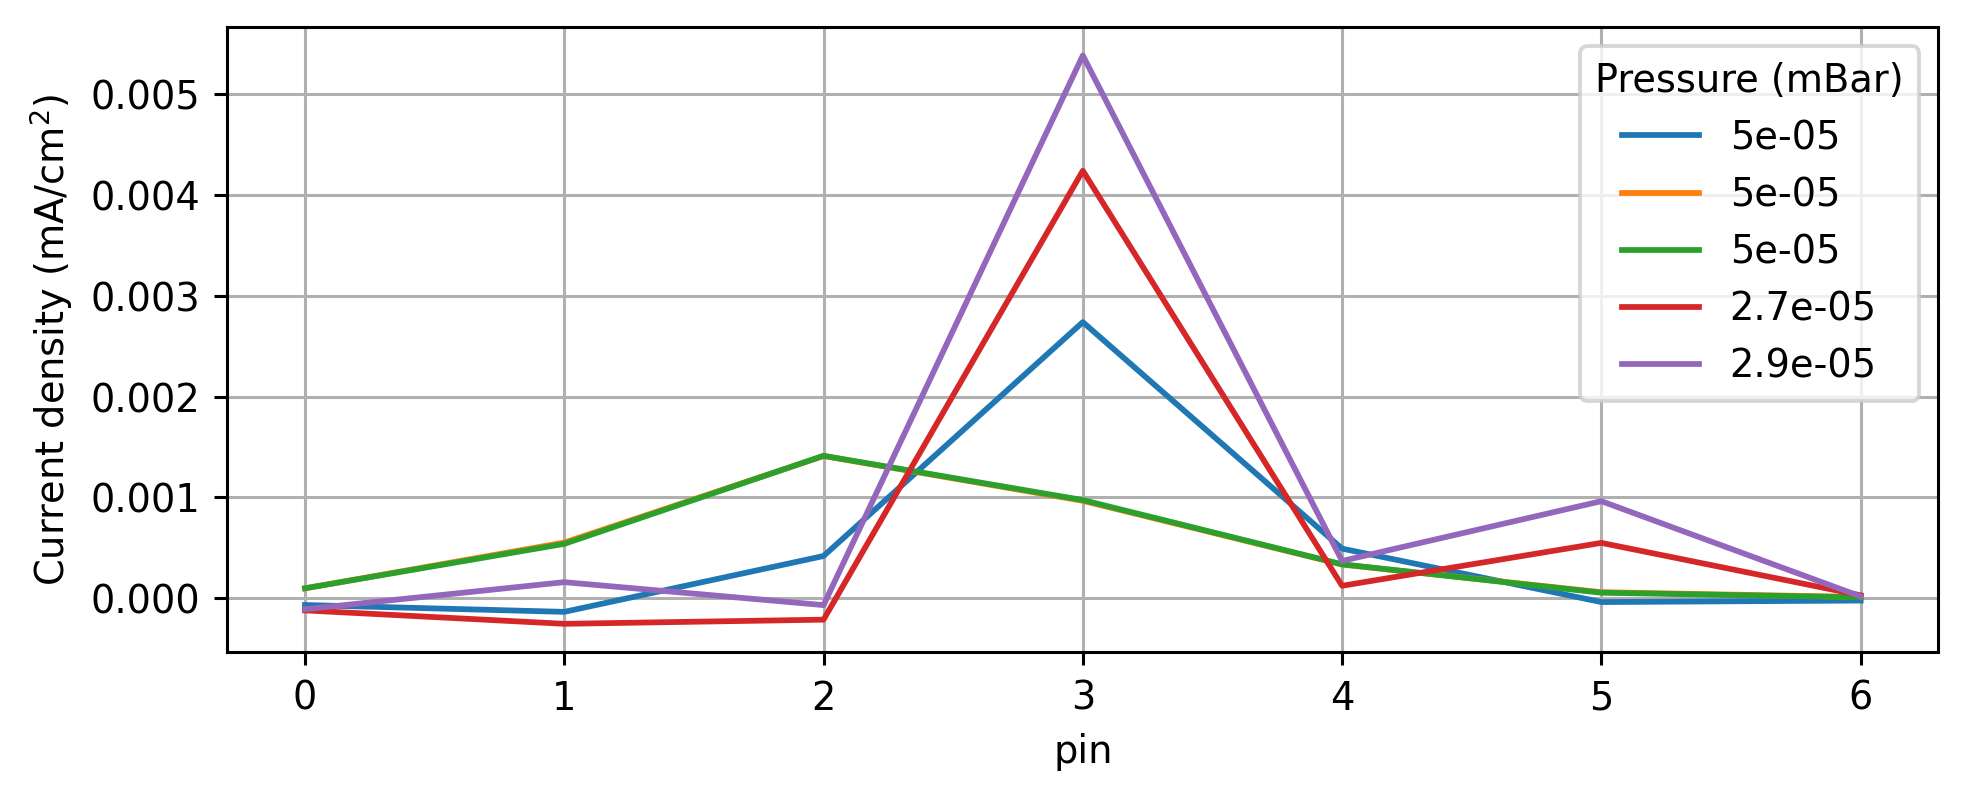

In [19]:
middleRowI = len(savedData.data[0]['currents']) //2
currentSlices = []
for run in savedData.data:
    currentSlices.append(run['currents'][middleRowI])

import matplotlib.pyplot as plt
plt.figure(dpi = 276, figsize = (8,3))
for i, currents in enumerate(currentSlices):
    plt.plot(currents, label = savedData.data[i]["pressure"])
plt.legend(title = "Pressure (mBar)")
plt.grid()
plt.ylabel('Current density (mA/cm$^2$)')
plt.xlabel('pin')
plt.show()

##### Plot of $I_{base}$ and $I_{PinMax}$ vs Run

In [4]:
x = []
Ibase = []
IpinMax = []
for i, run in enumerate(savedData.data):
    x.append(i)
    Ibase.append(run['Ibase'])
    currents = np.array(run['currents'])
    IpinMax.append(np.max(currents)) 

In [6]:
import plotly.express as px
import numpy as np
# df = px.data.iris()
fig = px.scatter(df, x='Vtube', y='Ibase', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })
# fig.
fig.update_layout(height=600)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['time', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Ibase', 'pressure', 'IpinMax', 'note'] but received: Vtube

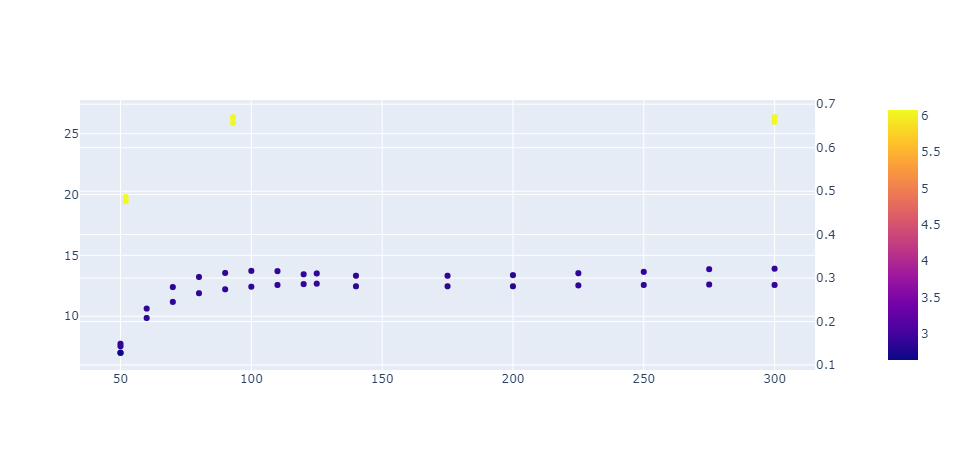

In [52]:
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.scatter(df, x='Vtube', y='Ibase', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })
fig2 = px.scatter(df, x='Vtube', y='Itube', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })

fig3 = px.scatter(df, x='Vtube', y='Ibias', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })

# fig2.update_traces(yaxis="y2")
fig3.update_traces(yaxis="y2")
subfig.add_traces(fig.data + fig3.data)
# subfig.layout.xaxis.title="Time"
# subfig.layout.yaxis.title="Linear Y"
# subfig.layout.yaxis2.type="log"
# subfig.layout.yaxis2.title="Log Y"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
# subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()